In [21]:
pip install openai==0.28

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (46.3 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/s

In [46]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

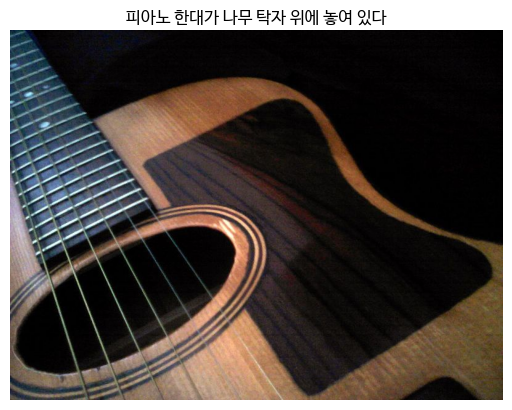

In [47]:
import os
import random
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 폴더 경로 설정
folder_path = '/content/drive/MyDrive/sample_data_image2'
folder_path_json = '/content/drive/MyDrive/sample_data_image2_json'

# 해당 폴더 내의 모든 파일 목록 가져오기
file_list = os.listdir(folder_path)
file_list_json = os.listdir(folder_path_json)

# 지정된 형식에 맞는 파일만 필터링
filtered_files = [file for file in file_list if file.endswith('.jpg') and file.startswith('110100')]

# 랜덤하게 하나의 파일 선택
selected_image_file = random.choice(filtered_files)

# 이미지 파일 경로
image_path = os.path.join(folder_path, selected_image_file)

# 동일한 이름의 JSON 파일 찾기
json_file = selected_image_file.replace('.jpg', '.json')

# JSON 파일 경로
json_path = os.path.join(folder_path_json, json_file)

# JSON 파일 읽기
with open(json_path, 'r') as file:
    data = json.load(file)

# 캡션 추출
caption = data.get('caption', 'No caption available')

# 이미지 로드 및 출력
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.title(caption)  # 캡션을 이미지 위에 출력
plt.show()

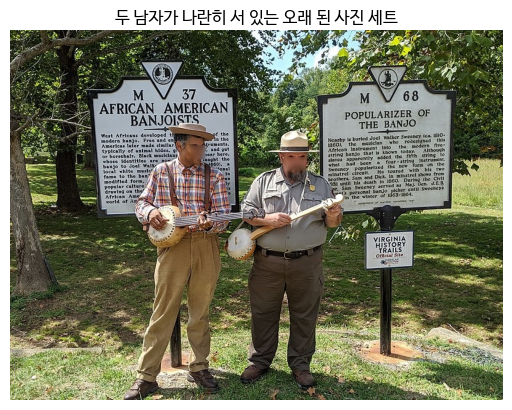

In [117]:
# 랜덤하게 하나의 파일 선택
selected_image_file = random.choice(filtered_files)

# 이미지 파일 경로
image_path = os.path.join(folder_path, selected_image_file)

# 동일한 이름의 JSON 파일 찾기
json_file = selected_image_file.replace('.jpg', '.json')

# JSON 파일 경로
json_path = os.path.join(folder_path_json, json_file)

# JSON 파일 읽기
with open(json_path, 'r') as file:
    data = json.load(file)

# 캡션 추출
caption = data.get('caption', 'No caption available')

# 이미지 로드 및 출력
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.title(caption)  # 캡션을 이미지 위에 출력
plt.show()

In [79]:
## 본인의 openai api 키 입력
OPENAI_API_KEY = 'sk-'

In [80]:
import openai
import os
import time

openai.api_key  = OPENAI_API_KEY

In [118]:
parameters = {
    "temperature": 0.7,
    "top_p": 0.7,
    "frequency_penalty": 0.5,
    "presence_penalty": 0.55,
    "max_tokens": 2048
}

# 초안

In [26]:
def get_completion(prompt, model="gpt-3.5-turbo-0613", temperature=0, verbose=False):
    messages = [{"role": "user", "content": prompt}]

    time_start = time.time()
    retry_count = 3
    for i in range(0, retry_count):
        while True:
            try:
                response = openai.ChatCompletion.create(
                    model=model,
                    messages=messages,
                    temperature=temperature, # this is the degree of randomness of the model's output
                )
                answer = response['choices'][0]['message']['content'].strip()
                tokens = response.usage.total_tokens


                time_end = time.time()

                if verbose:
                    print('prompt: %s | token: %d | %.1fsec\answer : %s'%(prompt, tokens, (time_end - time_start), answer))
                return answer

            except Exception as error:
                print(f"API Error: {error}")
                print(f"Retrying {i+1} time(s) in 4 seconds...")

                if i+1 == retry_count:
                    return prompt, None, None
                time.sleep(4)
                continue

In [27]:
prompt = f"""
To support students with lower literacy skills, I'm creating specialized questions.
Each question will focus on substituting a word from a provided sentence.
Both the correct answer and an incorrect alternative will be given.

Procedure for Creating Each Question:
1. Select a sentence.
2. Choose a key word from the sentence.
3. Identify a word that correctly substitutes the key word (Correct Answer).
4. Think of a word that is an incorrect substitute for the key word (Incorrect Answer).

For example:
Question 1:
Caption : "오래된 오토바이 한대가 해변에 주차되어있다.",
Key Word : "주차",
Correct : "정차",
Correct : "영차"

Create two questions in Python dictionary format using different key words from the following caption:
Caption: '''{caption}'''

"""
setquestion = get_completion(prompt, model="gpt-3.5-turbo-0613")
print(setquestion)

Question 1:
{
  "Caption": "기타를 들고 있는 한 무리의 남자들",
  "Key Word": "들고",
  "Correct Answer": "잡고",
  "Incorrect Answer": "놓고"
}

Question 2:
{
  "Caption": "기타를 들고 있는 한 무리의 남자들",
  "Key Word": "남자들",
  "Correct Answer": "여자들",
  "Incorrect Answer": "아이들"
}


# 파라미터 설정 completion 함수

In [51]:
def get_completion_2(prompt, model="gpt-3.5-turbo-0613", parameters=None, verbose=False):
    messages = [{"role": "user", "content": prompt}]

    # parameters가 None이면 기본값을 설정
    if parameters is None:
        parameters = {
            "temperature": 0.7,
            "max_tokens": 150,
            "top_p": 1,
            "frequency_penalty": 0,
            "presence_penalty": 0
        }

    time_start = time.time()
    retry_count = 3

    for i in range(retry_count):
        try:
            response = openai.ChatCompletion.create(
                model=model,
                messages=messages,
                temperature=parameters.get("temperature"),
                max_tokens=parameters.get("max_tokens"),
                top_p=parameters.get("top_p"),
                frequency_penalty=parameters.get("frequency_penalty"),
                presence_penalty=parameters.get("presence_penalty"),
            )
            answer = response['choices'][0]['message']['content'].strip()
            tokens = response.usage.total_tokens

            time_end = time.time()

            if verbose:
                print('prompt: %s | tokens: %d | %.1fsec\nanswer: %s' % (prompt, tokens, (time_end - time_start), answer))
            return answer

        except Exception as error:
            print(f"API Error: {error}")
            print(f"Retrying {i+1} time(s) in 4 seconds...")

            if i+1 == retry_count:
                return prompt, None, None
            time.sleep(4)


In [115]:
prompt = f"""
To support students with lower literacy skills, I'm creating specialized questions.
Each question will focus on substituting a word from a provided sentence.
Both the correct answer and an incorrect alternative will be given.

Procedure for Creating Each Question:
1. Select a sentence.
2. Choose a key word from the sentence.
3. Identify a word that correctly substitutes the key word (Correct Answer).
4. Think of a word that is an incorrect substitute for the key word (Incorrect Answer).

For example:
Question 1:
Caption : "오래된 오토바이 한대가 해변에 주차되어있다.",
Key Word : "주차",
Correct : "정차",
Incorrect : "영차"

Create two questions in Python dictionary format using different key words from the following caption:
Caption: '''{caption}'''

"""
setquestion = get_completion_2(prompt, model="gpt-3.5-turbo-0613", parameters=parameters)
print(setquestion)

{
  "question1": {
    "caption": "정장을 입고 넥타이를 맨 남자가 벤치에 앉아 있다",
    "key_word": "입고",
    "options": {
      "correct_answer": "착용",
      "incorrect_answer": "신고"
    }
  },
  "question2": {
    "caption": "정장을 입고 넥타이를 맨 남자가 벤치에 앉아 있다",
    "key_word": "앉아",
    "options": {
      "correct_answer": "걷는다",
      "incorrect_answer": "뛴다"
    }
  }
}


- 최대 40

In [96]:
print("setquestion = %s" % setquestion)
print("setquestion type = %s" % type(setquestion))

json_val = {
  "question1": {
    "caption": "한 무리의 사람들이 악기를 연주하며 테이블에 앉아 있다",
    "key_word": "앉아",
    "options": {
      "correct_answer": "서 있어",
      "incorrect_answer": "뛰어"
    }
  },
  "question2": {
    "caption": "한 무리의 사람들이 악기를 연주하며 테이블에 앉아 있다",
    "key_word": "'악기'",
    'options': {
        'correct_answer': '연주',
        'incorrect_answer': '감상'
   }
}
}
json_val type = <class 'str'>


# 출력 포맷 설정(최종)

## json 작업을 위한 스키마

## 문제하나

In [54]:
# quiz_data_schema = {
#   "type": "object",
#   "properties": {
#     "caption": {
#       "type": "string",
#       "description": "The caption describing the scenario or context of the question."
#     },
#     "key_word": {
#       "type": "string",
#       "description": "The key word or phrase that is the focus of the question."
#     },
#     "options": {
#       "type": "object",
#       "properties": {
#         "correct_answer": {
#           "type": "string",
#           "description": "The correct answer for the key word."
#         },
#         "incorrect_answer": {
#           "type": "string",
#           "description": "An incorrect answer alternative for the key word."
#         }
#       },
#       "required": ["correct_answer", "incorrect_answer"]
#     }
#   },
#   "required": ["caption", "key_word", "options"]
# }

## 문제 둘

In [57]:
quiz_data_schema = {
  "type": "object",
  "properties": {
    "question1": {
      "type": "object",
      "properties": {
        "caption": {
          "type": "string",
          "description": "The caption describing the scenario or context of question 1."
        },
        "key_word": {
          "type": "string",
          "description": "The key word or phrase that is the focus of question 1."
        },
        "options": {
          "type": "object",
          "properties": {
            "correct_answer": {
              "type": "string",
              "description": "The correct answer for the key word of question 1."
            },
            "incorrect_answer": {
              "type": "string",
              "description": "An incorrect answer alternative for the key word of question 1."
            }
          },
          "required": ["correct_answer", "incorrect_answer"]
        }
      },
      "required": ["caption", "key_word", "options"]
    },
    "question2": {
      "type": "object",
      "properties": {
        "caption": {
          "type": "string",
          "description": "The caption describing the scenario or context of question 2."
        },
        "key_word": {
          "type": "string",
          "description": "The key word or phrase that is the focus of question 2."
        },
        "options": {
          "type": "object",
          "properties": {
            "correct_answer": {
              "type": "string",
              "description": "The correct answer for the key word of question 2."
            },
            "incorrect_answer": {
              "type": "string",
              "description": "An incorrect answer alternative for the key word of question 2."
            }
          },
          "required": ["correct_answer", "incorrect_answer"]
        }
      },
      "required": ["caption", "key_word", "options"]
    }
  },
  "required": ["question1", "question2"]
}

 - "Caption", "Key Word"를 포함하고, "Correct Answer"와 "Incorrect Answer"를 'options' 객체 안에 포함

In [88]:
def get_completion_3(prompt, model="gpt-3.5-turbo-0613", parameters=None, verbose=False):
    messages = [{"role": "user", "content": prompt}]
    # Implement a function call with JSON output schema
    functions=[{
        "name": "get_new_quiz",
        "description": "Get a new quiz with two options about the given caption. There's only one correct option.",
        "parameters": quiz_data_schema
    }]
    # Define the function which needs to be called when the output has received
    function_call={"name": "get_new_quiz"}

    # parameters가 None이면 기본값을 설정
    if parameters is None:
        parameters = {
            "temperature": 0.7,
            "max_tokens": 150,
            "top_p": 1,
            "frequency_penalty": 0,
            "presence_penalty": 0
        }

    time_start = time.time()
    retry_count = 3

    for i in range(retry_count):
        try:
            response = openai.ChatCompletion.create(
                model=model,
                messages=messages,
                functions=functions,
                function_call=function_call,
                temperature=parameters.get("temperature"),
                max_tokens=parameters.get("max_tokens"),
                top_p=parameters.get("top_p"),
                frequency_penalty=parameters.get("frequency_penalty"),
                presence_penalty=parameters.get("presence_penalty"),
            )
            #answer = response['choices'][0]['message']['content'].strip()
            answer_json_string = response["choices"][0]["message"]["function_call"]["arguments"]
            tokens = response.usage.total_tokens

            time_end = time.time()

            if verbose:
                print('prompt: %s | tokens: %d | %.1fsec\nanswer: %s' % (prompt, tokens, (time_end - time_start), answer))
            return answer_json_string

        except Exception as error:
            print(f"API Error: {error}")
            print(f"Retrying {i+1} time(s) in 4 seconds...")

            if i+1 == retry_count:
                return prompt, None, None
            time.sleep(4)


In [119]:
prompt = f"""
To support students with lower literacy skills, I'm creating specialized questions.
Each question will focus on substituting a word from a provided sentence.
Both the correct answer and an incorrect alternative will be given.

Procedure for Creating Each Question:
1. Select a sentence.
2. Choose a key word from the sentence.
3. Identify a word that correctly substitutes the key word (Correct Answer).
4. Think of a word that is an incorrect substitute for the key word (Incorrect Answer).

For example:
Question 1:
Caption : "오래된 오토바이 한대가 해변에 주차되어있다.",
Key Word : "주차",
Correct : "정차",
Incorrect : "영차"

Create two questions using different key words from the following caption:
Caption: '''{caption}'''

"""
setquestion = get_completion_3(prompt, model="gpt-3.5-turbo-0613", parameters=parameters)
print(setquestion)

{
  "question1": {
    "caption": "두 남자가 나란히 서 있는 오래 된 사진 세트",
    "key_word": "나란히",
    "options": {
      "correct_answer": "병렬로",
      "incorrect_answer": "따로"
    }
  },
  "question2": {
    "caption": "두 남자가 나란히 서 있는 오래 된 사진 세트",
    "key_word": "오래 된",
    "options": {
      "correct_answer": "오래된",
      "incorrect_answer": "새로운"
    }
  }
}


- 2-30초 정도로 일관

In [121]:
print("setquestion = %s" % setquestion)
print("setquestion type = %s" % type(setquestion))

setquestion = {
  "question1": {
    "caption": "두 남자가 나란히 서 있는 오래 된 사진 세트",
    "key_word": "나란히",
    "options": {
      "correct_answer": "병렬로",
      "incorrect_answer": "따로"
    }
  },
  "question2": {
    "caption": "두 남자가 나란히 서 있는 오래 된 사진 세트",
    "key_word": "오래 된",
    "options": {
      "correct_answer": "오래된",
      "incorrect_answer": "새로운"
    }
  }
}
setquestion type = <class 'str'>
